# 'OO공장의 압연공정 상 불량 발생의 원인 탐색 및 개선안 도출

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from statsmodels.api import Logit
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import export_graphviz
import graphviz

matplotlib.rc('font', family= 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)

C:\Users\haeun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\haeun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 1. 데이터 탐색

## 데이터 구성하기

In [2]:
df_raw = pd.read_csv("C:/Users/jupyter/221026_Big Data 분석_실습화일/2. Big Data 분석/SCALE불량.csv", encoding='euc_kr')
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2021-08-04:21:24:11,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2021-08-04:21:31:21,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2021-08-04:21:38:31,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2021-08-04:21:45:41,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THICK           720 non-null    float64
 6   PT_WIDTH           720 non-null    int64  
 7   PT_LENGTH          720 non-null    int64  
 8   PT_WEIGHT          720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [3]:
df_raw.drop('PLATE_NO', axis=1, inplace=True)

In [4]:
df_raw.drop('ROLLING_DATE', axis=1, inplace=True)

### 총 720개의 데이터, 21개의 변수(목표변수 1개, 설명변수 20개)
### PLATE_NO drop : index역할만 하는 변수이기 때문에
### ROLLING_DATE drop : 분석에 이용하지 않을 변수

## 컬럼명 확인(변수 확인)

In [9]:
df_raw.columns

Index(['SCALE', 'SPEC', 'STEEL_KIND', 'PT_THICK', 'PT_WIDTH', 'PT_LENGTH',
       'PT_WEIGHT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP', 'FUR_HZ_TIME',
       'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

### 설명변수 SCALE : 불량(1), 양품(0)으로 바꿈

In [5]:
df_raw.loc[df_raw['SCALE']=='불량','SCALE'] = 1
df_raw.loc[df_raw['SCALE']=='양품','SCALE'] = 0

df_raw['SCALE'].head()

0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: object

In [6]:
df_raw = df_raw.astype({'SCALE':'int'})

### SPEC 변수(범주형) 처리

In [12]:
df_raw['SPEC'].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'COMMON', 'GL-E32-TM',
       'GL-E36-TM', 'AB/EH36-TM', 'KS-HSB600', 'LR-EH36-TM', 'BV-B',
       'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A', 'JS-SM490A', 'KS-SM400B',
       'JS-SM400B', 'AB/B', 'KS-SS400', 'KR-A', 'NV-A', 'JS-SS400',
       'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'BV-AH32', 'JS-SM490YA',
       'AB/AH32', 'LR-AH32', 'NV-B', 'NV-A32', 'KS-SM490A', 'NK-KA32',
       'GL-A32', 'AB/A', 'LR-AH36', 'A709-36', 'KR-AH32', 'A516-60',
       'GL-A', 'NK-KA', 'NV-D36-TM', 'NK-KA32-TM', 'GL-A32-TM',
       'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM', 'KS-HSB500', 'API-2W-50T',
       'GL-A36-TM', 'BV-EH32-TM', 'NV-A32-TM', 'NV-D32-TM', 'NK-KD36-TM',
       'GL-D36-TM', 'PILAC-BT33', 'BV-AH32-TM', 'BV-AH36-TM', 'NV-A36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'BV-A', 'CCS-B', 'A283-C', 'SA283-C',
       'JS-SM400A'], dtype=object)

In [13]:
### 규격 종류가 너무 많음
### 규격에 따라 지시두께, 지시폭, 지시길이, 지시중량이 다를 것이기 때문에 규격 제거

In [7]:
df_raw.drop('SPEC', axis=1, inplace=True)

### STEEL_KINDS 변수(범주형) 처리

In [8]:
# 값별 데이터 수 확인
df_raw['STEEL_KIND'].value_counts()

C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

<AxesSubplot:xlabel='STEEL_KIND,SCALE'>

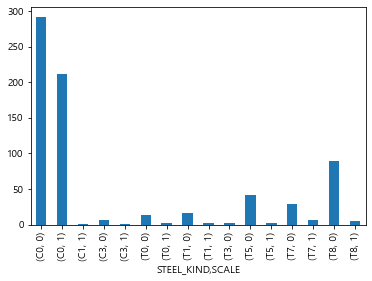

In [9]:
# 값 별 SCALE 확인
df_raw.groupby('STEEL_KIND')['SCALE'].value_counts().plot.bar()

In [13]:
# 강종 C0의 경우 불량인 경우가 많다는 것을 확인할 수 있다
# 따라서 STEE_KIND는 변화 없이 그대로 분석에 input하도록 한다

### FUR_NO, FUR_NO_ROW 합치고 FUR_NO_ROW 삭제

In [8]:
df_raw['FUR_NO'] = df_raw['FUR_NO']+'_'+df_raw['FUR_NO_ROW']
df_raw.drop('FUR_NO_ROW', axis=1, inplace=True)

In [16]:
df_raw['FUR_NO']

0      1호기_1열
1      1호기_2열
2      2호기_1열
3      2호기_2열
4      3호기_1열
        ...  
715    3호기_1열
716    2호기_1열
717    2호기_2열
718    3호기_2열
719    3호기_1열
Name: FUR_NO, Length: 720, dtype: object

In [16]:
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707,15109,14180,1호기_1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,0,T1,32.25,3707,15109,14180,1호기_2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,0,T8,33.27,3619,19181,18130,2호기_1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,0,T8,33.27,3619,19181,18130,2호기_2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,0,T8,38.33,3098,13334,12430,3호기_1열,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,C0,20.14,3580,38639,21870,3호기_1열,1172,72,1164,62,245,1155,1005,적용,8,2조
716,0,C0,15.08,3212,48233,18340,2호기_1열,1150,61,1169,61,238,1160,947,적용,10,1조
717,0,C0,16.60,3441,43688,19590,2호기_2열,1169,65,1163,77,247,1152,948,적용,10,4조
718,0,C0,15.59,3363,48740,80240,3호기_2열,1179,86,1163,45,243,1154,940,적용,10,2조


### 기초 통계량 확인

In [17]:
df_raw.describe()

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.320833,29.267857,2807.127778,34323.269444,41481.777778,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,0.467121,19.152651,517.839690,13828.434837,24751.322015,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,0.000000,12.030000,1800.000000,7893.000000,7820.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,0.000000,16.090000,2466.000000,22663.000000,17757.500000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,0.000000,20.130000,2725.000000,37380.000000,36120.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,1.000000,40.000000,3125.000000,43735.000000,61120.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,1.000000,100.340000,4575.000000,54917.000000,115080.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


In [18]:
# 편차를 보면 각 변수별 차이가 크다
# 이후 표준화가 필요한 경우 scaling을 하도록 한다

# 2. 데이터 전처리

## 결측치 확인 및 처리

In [18]:
df_raw.isnull().sum()

SCALE                0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [20]:
# 결측치는 없는 것으로 확인된다

## 이상치 확인 및 처리

<AxesSubplot:>

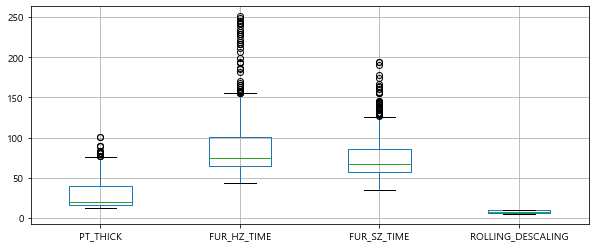

In [21]:
# 범위가 비슷한 변수끼리 boxplot 확인
df_raw.boxplot(['PT_THICK', 'FUR_HZ_TIME', 'FUR_SZ_TIME', 'ROLLING_DESCALING'],figsize=(10, 4))

<AxesSubplot:>

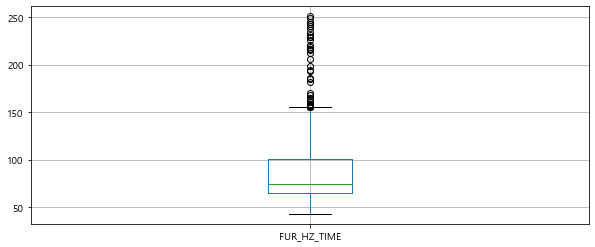

In [22]:
# 범위가 비슷한 변수끼리 boxplot 확인
df_raw.boxplot(['FUR_HZ_TIME'],figsize=(10, 4))

<AxesSubplot:>

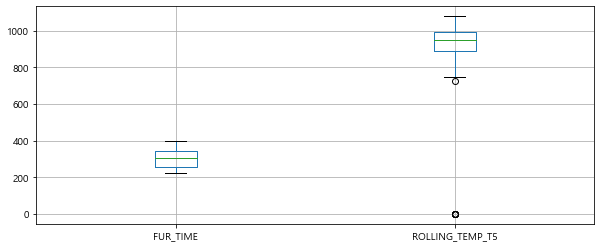

In [23]:
# 범위가 비슷한 변수끼리 boxplot 확인
df_raw.boxplot(['FUR_TIME', 'ROLLING_TEMP_T5'],figsize=(10, 4))

In [24]:
df_raw[df_raw['ROLLING_TEMP_T5']==0]

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,0,T8,55.51,3765,11398,37400,3호기_2열,1132,95,1128,80,341,1123,0,적용,6,1조
184,0,C0,16.09,2221,43596,61150,3호기_1열,1169,64,1164,61,308,1155,0,적용,10,3조
185,0,C0,16.09,2221,43596,61150,3호기_2열,1163,57,1166,67,303,1158,0,적용,10,4조
494,0,T5,80.82,2085,12919,17090,2호기_1열,1133,89,1122,59,378,1112,0,적용,6,2조
495,0,T5,80.82,2085,13176,17430,1호기_2열,1130,92,1124,61,362,1116,0,적용,6,3조
496,0,T0,40.35,2497,23592,37320,3호기_1열,1119,109,1117,76,383,1107,0,적용,6,3조


In [9]:
df_raw[df_raw['ROLLING_TEMP_T5']==0]['ROLLING_TEMP_T5'] = df_raw['ROLLING_TEMP_T5'].mean()

<ipython-input-9-f58ca2120b0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw[df_raw['ROLLING_TEMP_T5']==0]['ROLLING_TEMP_T5'] = df_raw['ROLLING_TEMP_T5'].mean()


In [26]:
# 조사에 따르면 압연 온도는 상당히 높아야하며 절대 0도가 될 수 없다
# 평균값으로 대체한다

<AxesSubplot:>

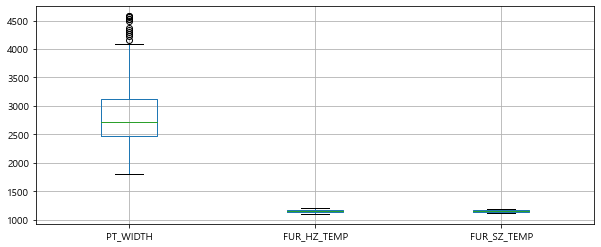

In [27]:
# 범위가 비슷한 변수끼리 boxplot 확인
df_raw.boxplot(['PT_WIDTH', 'FUR_HZ_TEMP','FUR_SZ_TEMP'],figsize=(10, 4))

<AxesSubplot:>

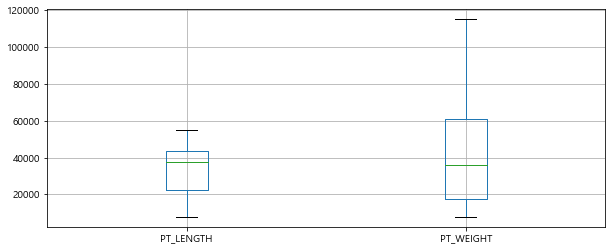

In [28]:
# 범위가 비슷한 변수끼리 boxplot 확인
df_raw.boxplot(['PT_LENGTH', 'PT_WEIGHT'],figsize=(10, 4))

In [29]:
# 이상치 처리 완료

In [30]:
# 최종 데이터 확인
df_raw

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707,15109,14180,1호기_1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,0,T1,32.25,3707,15109,14180,1호기_2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,0,T8,33.27,3619,19181,18130,2호기_1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,0,T8,33.27,3619,19181,18130,2호기_2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,0,T8,38.33,3098,13334,12430,3호기_1열,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,C0,20.14,3580,38639,21870,3호기_1열,1172,72,1164,62,245,1155,1005,적용,8,2조
716,0,C0,15.08,3212,48233,18340,2호기_1열,1150,61,1169,61,238,1160,947,적용,10,1조
717,0,C0,16.60,3441,43688,19590,2호기_2열,1169,65,1163,77,247,1152,948,적용,10,4조
718,0,C0,15.59,3363,48740,80240,3호기_2열,1179,86,1163,45,243,1154,940,적용,10,2조


In [31]:
# 연속형 : 'PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 
#     'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'
# 범주형 : 'SCALE', 'STEEL_KIND', 'FUR_NO', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'

# 3. 그래프 분석

### 연속형 -> hist, scatter(pair plot)

### 범주형 -> bar-chart 

### 범주형 데이터 bar chart : 값 개수 확인

Text(0.5, 1.0, 'WORK_GR')

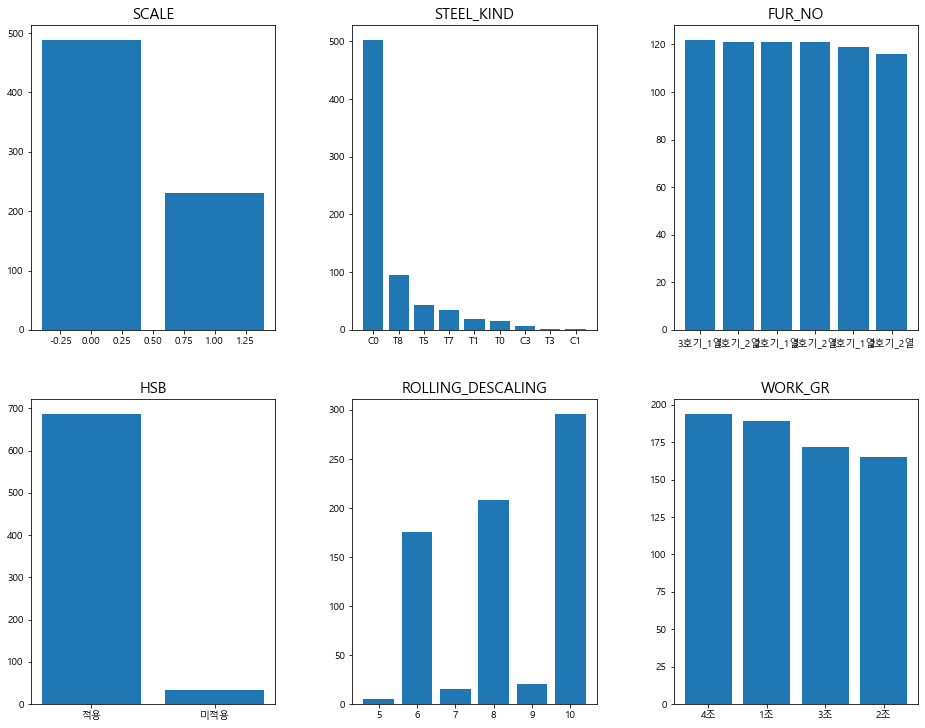

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
plt.tight_layout(w_pad=5, h_pad=5)

# 'SCALE'
df_count_1 = df_raw['SCALE'].value_counts()
axes[0, 0].bar(df_count_1.index.tolist(),df_count_1.tolist())
axes[0, 0].set_title('SCALE', fontsize=15)

# 'STEEL_KIND'
df_count_2 = df_raw['STEEL_KIND'].value_counts()
axes[0, 1].bar(df_count_2.index.tolist(),df_count_2.tolist())
axes[0, 1].set_title('STEEL_KIND', fontsize=15)

# 'FUR_NO'
df_count_3 = df_raw['FUR_NO'].value_counts()
axes[0, 2].bar(df_count_3.index.tolist(),df_count_3.tolist())
axes[0, 2].set_title('FUR_NO', fontsize=15)

# 'HSB'
df_count_4 = df_raw['HSB'].value_counts()
axes[1, 0].bar(df_count_4.index.tolist(),df_count_4.tolist())
axes[1, 0].set_title('HSB', fontsize=15)

# 'ROLLING_DESCALING'
df_count_5 = df_raw['ROLLING_DESCALING'].value_counts()
axes[1, 1].bar(df_count_5.index.tolist(),df_count_5.tolist())
axes[1, 1].set_title('ROLLING_DESCALING', fontsize=15)

# 'WORK_GR'
df_count_6 = df_raw['WORK_GR'].value_counts()
axes[1, 2].bar(df_count_6.index.tolist(),df_count_6.tolist())
axes[1, 2].set_title('WORK_GR', fontsize=15)

In [33]:
# SCALE : 양품(0)이 불량(1)보다 많지만, 불량이 양품의 절반이나 된다
# STEEL_KIND : 'CO'이 약 500개이고 나머지는 100개 미만으로 'C0'이 데이터의 대다수를 차지한다
# FUR_NO : 범주별로 데이터 양이 비슷하다
# HSB : 적용이 대다수이다
# ROLLING_DESCAILING : 6, 8, 10가 대다수이며 10이 약 300개로 가장 많다
# WORK_GR : 4조가 가장 많고 2조가 가장 적다

### 범주형 데이터 bar chart : SCALE 기준 개수 확인

Text(0.5, 1.0, 'WORK_GR')

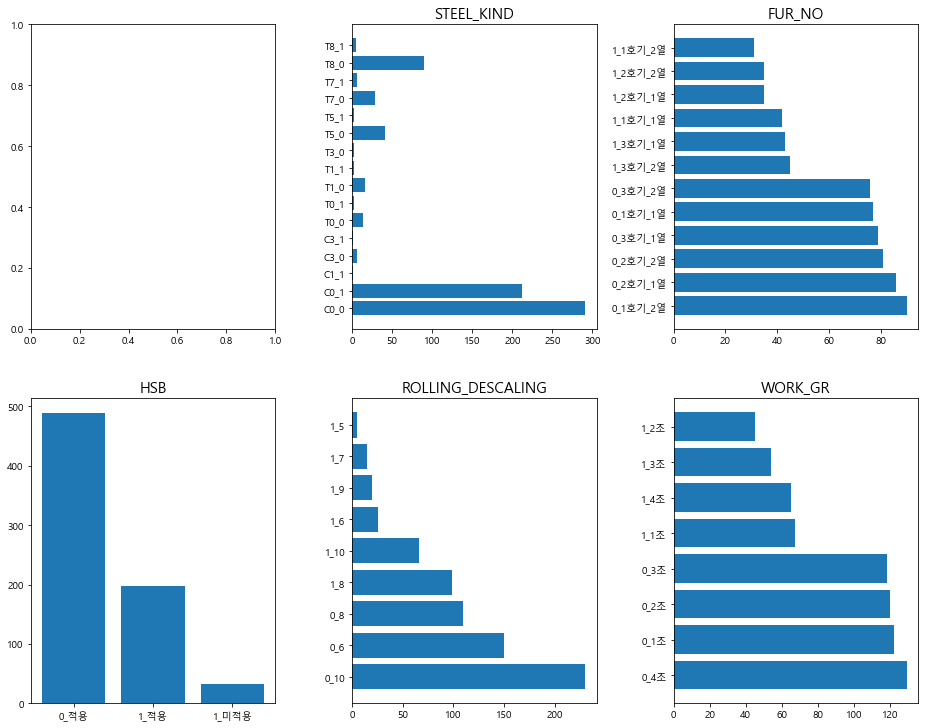

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
plt.tight_layout(w_pad=5, h_pad=5)

# 'STEEL_KIND'
df_count_2 = df_raw.groupby(['STEEL_KIND','SCALE']).size()
lis = df_count_2.index.tolist()
lis_lis = [lis[i][0]+'_'+str(lis[i][1]) for i in range(len(lis))]
axes[0, 1].barh(lis_lis,df_count_2.tolist())
axes[0, 1].set_title('STEEL_KIND', fontsize=15)

# 'FUR_NO'
df_count_3 = df_raw.groupby('SCALE')['FUR_NO'].value_counts()
lis1 = df_count_3.index.tolist()
lis_lis1 = [str(lis1[i][0])+'_'+str(lis1[i][1]) for i in range(len(lis1))]
axes[0, 2].barh(lis_lis1,df_count_3.tolist())
axes[0, 2].set_title('FUR_NO', fontsize=15)

# 'HSB'
df_count_4 = df_raw.groupby('SCALE')['HSB'].value_counts()
lis2 = df_count_4.index.tolist()
lis_lis2 = [str(lis2[i][0])+'_'+str(lis2[i][1]) for i in range(len(lis2))]
axes[1, 0].bar(lis_lis2,df_count_4.tolist())
axes[1, 0].set_title('HSB', fontsize=15)

# 'ROLLING_DESCALING'
df_count_5 = df_raw.groupby('SCALE')['ROLLING_DESCALING'].value_counts()
lis3 = df_count_5.index.tolist()
lis_lis3 = [str(lis3[i][0])+'_'+str(lis3[i][1]) for i in range(len(lis3))]
axes[1, 1].barh(lis_lis3 ,df_count_5.tolist())
axes[1, 1].set_title('ROLLING_DESCALING', fontsize=15)

# 'WORK_GR'
df_count_6 = df_raw.groupby('SCALE')['WORK_GR'].value_counts()
lis4 = df_count_6.index.tolist()
lis_lis4 = [str(lis4[i][0])+'_'+str(lis4[i][1]) for i in range(len(lis4))]
axes[1, 2].barh(lis_lis4 ,df_count_6.tolist())
axes[1, 2].set_title('WORK_GR', fontsize=15)

In [42]:
# STEEL_KIND : C0을 보면 양품(0)도 많지만 불량(1)의 비율이 굉장히 높다 -> C0와 관련이 있을 것이다
# FRU_NO : 대체로 비슷한 편이다
# HSB : 특이한 것이 HSB를 미적용한 경우 무조건 불량 이라는 것이다 -> HSO를 미적용하면 불량이다
# ROLLING_DESCALING : 5, 7, 9일 경우 무조건 불량 -> 5, 7, 9와 6,8,10 나눠서 검정
# WORK_GR : 대체로 비슷하다

In [43]:
# 연속형 : 'PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 
#     'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'

### 연속형 데이터 hist

Text(0.5, 1.0, 'ROLLING_TEMP_T5')

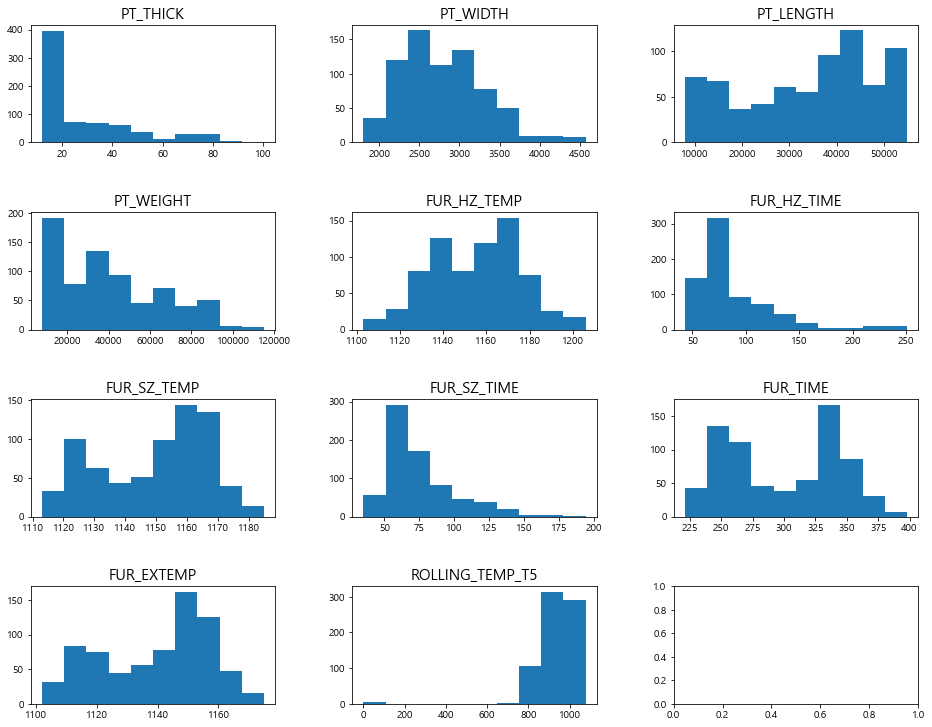

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 10))
plt.tight_layout(w_pad=5, h_pad=5)

# 'PT_THICK'
axes[0, 0].hist(df_raw['PT_THICK'])
axes[0, 0].set_title('PT_THICK', fontsize=15)

# 'PT_WIDTH'
axes[0, 1].hist(df_raw['PT_WIDTH'])
axes[0, 1].set_title('PT_WIDTH', fontsize=15)

# 'PT_LENGTH'
axes[0, 2].hist(df_raw['PT_LENGTH'])
axes[0, 2].set_title('PT_LENGTH', fontsize=15)

# 'PT_WEIGHT'
axes[1, 0].hist(df_raw['PT_WEIGHT'])
axes[1, 0].set_title('PT_WEIGHT', fontsize=15)

# 'FUR_HZ_TEMP'
axes[1, 1].hist(df_raw['FUR_HZ_TEMP'])
axes[1, 1].set_title('FUR_HZ_TEMP', fontsize=15)

# 'FUR_HZ_TIME'
axes[1, 2].hist(df_raw['FUR_HZ_TIME'])
axes[1, 2].set_title('FUR_HZ_TIME', fontsize=15)

# 'FUR_SZ_TEMP'
axes[2, 0].hist(df_raw['FUR_SZ_TEMP'])
axes[2, 0].set_title('FUR_SZ_TEMP', fontsize=15)

# 'FUR_SZ_TIME'
axes[2, 1].hist(df_raw['FUR_SZ_TIME'])
axes[2, 1].set_title('FUR_SZ_TIME', fontsize=15)

# 'FUR_TIME'
axes[2, 2].hist(df_raw['FUR_TIME'])
axes[2, 2].set_title('FUR_TIME', fontsize=15)

# 'FUR_EXTEMP'
axes[3, 0].hist(df_raw['FUR_EXTEMP'])
axes[3, 0].set_title('FUR_EXTEMP', fontsize=15)

# 'ROLLING_TEMP_T5'
axes[3, 1].hist(df_raw['ROLLING_TEMP_T5'])
axes[3, 1].set_title('ROLLING_TEMP_T5', fontsize=15)


In [45]:
## 좌우대칭인 변수 : PT_WIDTH
## 쌍봉우리(다봉우리) : PT_LENGTH, FUR_HZ_TEMP, FUR_SZ_TEMP, FUR_TIME, FUR_EXTEMP
## 왼쪽으로 치우힘 : PT_THICK, PT_WEIGHT, FUR_HZ_TIME, FUR_SZ_TIMME
## 오른쪽으로 치우침 : ROLIING_TEMP_T5

### 연속형 데이터 scatter plot

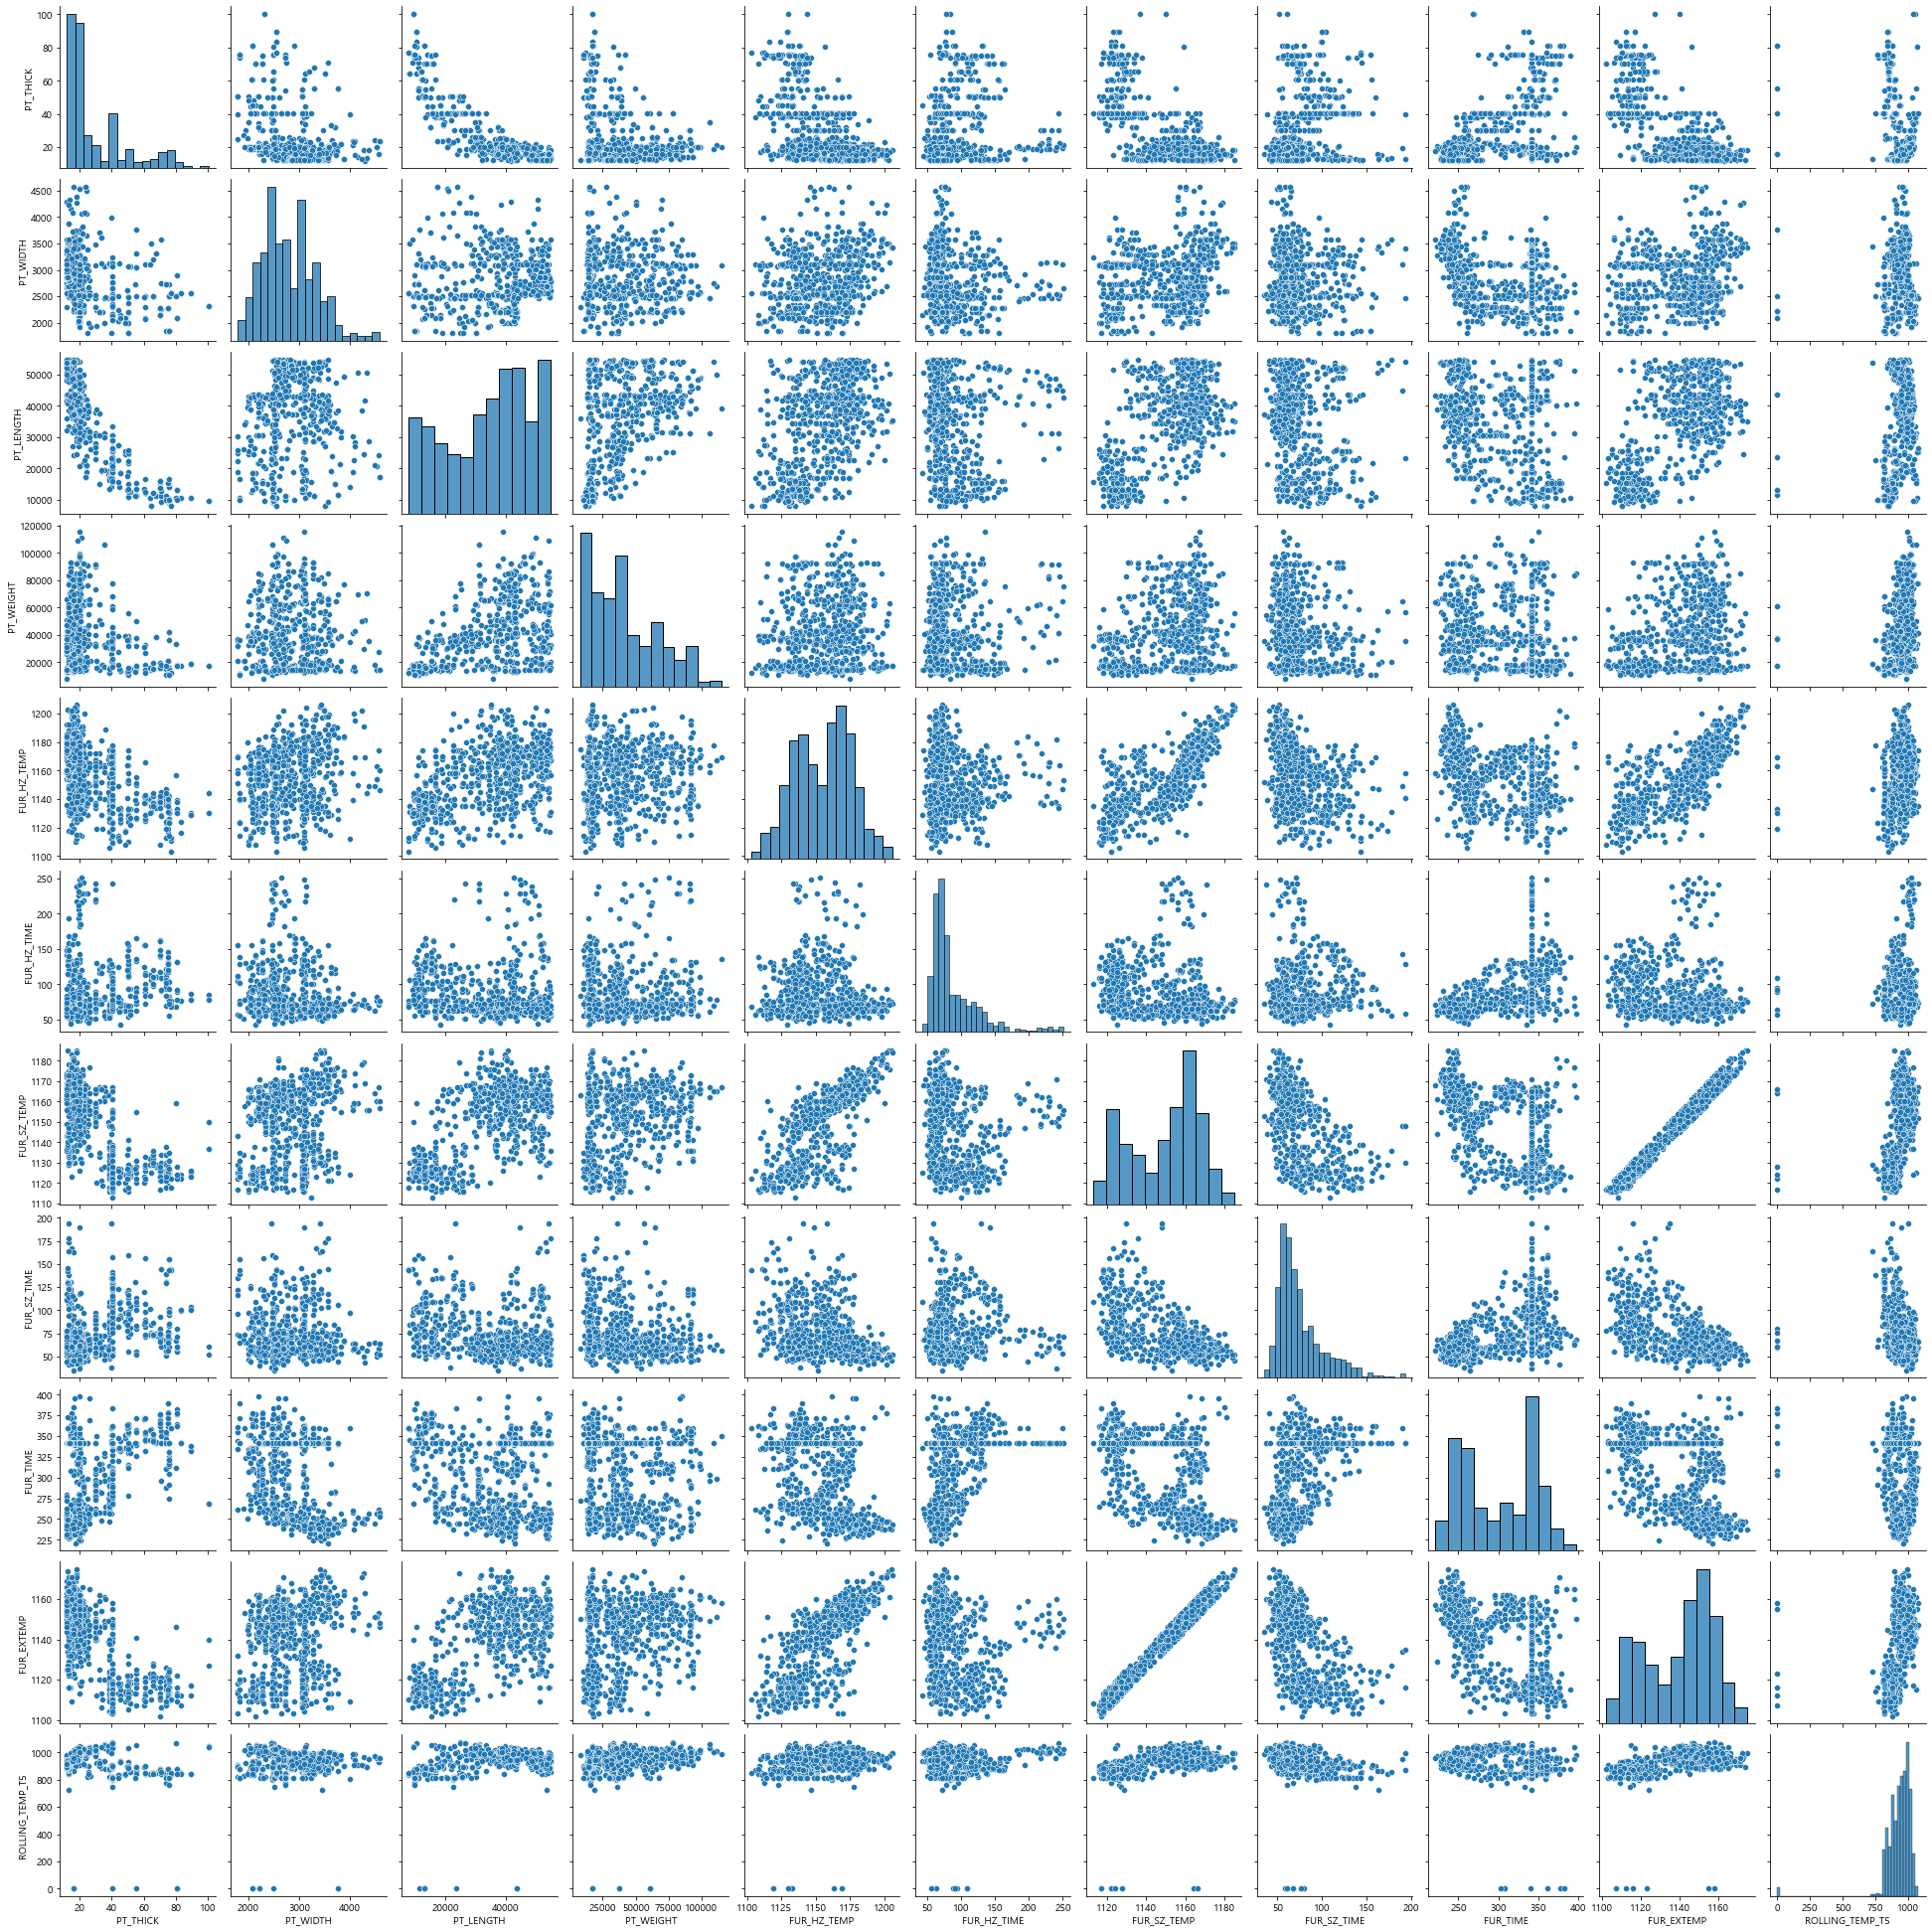

In [46]:
sns.pairplot(df_raw[['PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 
    'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5']])

In [47]:
# FUR_SZ_TEMP와 FUR_EXTEMP는 상관계수 1에 가깝다

### FUR_EXTEMP 변수 삭제

In [10]:
df_raw.drop('FUR_EXTEMP', axis=1, inplace=True)

### FUR_NO, WORK_GR 변수 삭제
### 값에 따라 양품, 불량의 차이가 거의 없다

In [11]:
df_raw.drop(['FUR_NO','WORK_GR'], axis=1, inplace=True)

# 4. 가설설정

### <그래프 결과로 확인된 관계성>
### [1] 강종이 'C0'이면 불량률이 높다

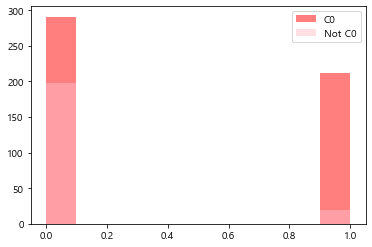

In [50]:
plt.hist(df_raw[(df_raw['STEEL_KIND']=='C0')]['SCALE'],
        label='C0', alpha=0.5, color='red')
plt.hist(df_raw[(df_raw['STEEL_KIND']!='C0')]['SCALE'],
        label='Not C0', alpha=0.5, color='pink')
plt.legend()

### [2] HSB를 미적용하면 불량이 발생한다

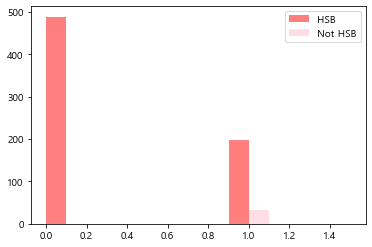

In [51]:
plt.hist(df_raw[(df_raw['HSB']=='적용')]['SCALE'],
        label='HSB', alpha=0.5, color='red')
plt.hist(df_raw[(df_raw['HSB']!='적용')]['SCALE'],
        label='Not HSB', alpha=0.5, color='pink')
plt.legend()

### [3] 압연 descaling 횟수가 홀수이면 불량이 발생한다

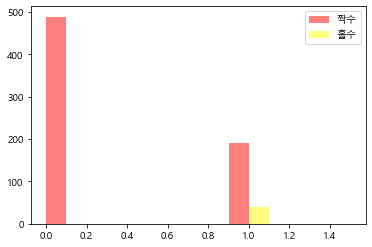

In [52]:
plt.hist(df_raw[(df_raw['ROLLING_DESCALING']%2==0)]['SCALE'],
        label='짝수', alpha=0.5, color='red')
plt.hist(df_raw[(df_raw['ROLLING_DESCALING']%2==1)]['SCALE'],
        label='홀수', alpha=0.5, color='yellow')
plt.legend()

### <엔지니어 가설>
### [4]  온도가 낮으면 불량이 발생한다

### [5] 판 두께가 얇아지면 불량이 발생한다

# 5. 모델링 및 모델 평가

### 5-1. 로지스틱 회귀분석

In [77]:
# 스케일링
v_feature_name = ['PT_THICK','PT_WIDTH','PT_LENGTH','PT_WEIGHT','FUR_HZ_TEMP',
                                         'FUR_HZ_TIME','FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
                                         'ROLLING_TEMP_T5','ROLLING_DESCALING']
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_raw[v_feature_name])
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled = pd.concat([df_raw[['SCALE','STEEL_KIND', 'HSB']],df_scaled], axis=1)
df_scaled

,SCALE,STEEL_KIND,HSB,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0,T1,적용,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,0.000734,-0.196930
1,0,T1,적용,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,0.028567,-0.196930
2,0,T8,적용,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-0.416748,-0.196930
3,0,T8,적용,0.209106,1.568896,-1.095771,-0.944112,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-0.453858,-0.196930
4,0,T8,적용,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-0.565186,-0.196930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,C0,적용,-0.476916,1.493531,0.312308,-0.792904,0.799021,-0.447338,0.816269,-0.511371,-1.224987,0.659429,-0.196930
716,0,C0,적용,-0.741293,0.782392,1.006578,-0.935621,-0.256038,-0.751008,1.101013,-0.549732,-1.379312,0.121341,1.036021
717,0,C0,적용,-0.661875,1.224921,0.677679,-0.885084,0.655149,-0.640583,0.759320,0.064041,-1.180894,0.130618,1.036021
718,0,C0,적용,-0.714646,1.074191,1.043267,1.566994,1.134722,-0.060849,0.759320,-1.163505,-1.269080,0.056399,1.036021


In [78]:
# 데이터 분할 train:test=6:4
df_train, df_test = train_test_split(df_scaled, test_size=0.4, random_state=1234)

print('train data size: {}'.format(df_train.shape))
print('test data size: {}'.format(df_test.shape))

train data size: (432, 14)
test data size: (288, 14)


In [79]:
df_train = sm.add_constant(df_train)

C:\Users\haeun\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [80]:
# 모델 및 회귀계수 검토
log_model = Logit.from_formula("""SCALE ~ C(STEEL_KIND)+PT_THICK+PT_WIDTH+PT_LENGTH+PT_WEIGHT+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+ROLLING_TEMP_T5+C(HSB)+ROLLING_DESCALING""", df_train)

log_result = log_model.fit(method = 'bfgs')

print(log_result.summary())

         Current function value: 0.258504
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  432
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                           19
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.5862
Time:                        11:16:37   Log-Likelihood:                -111.67
converged:                      False   LL-Null:                       -269.86
Covariance Type:            nonrobust   LLR p-value:                 8.685e-56
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.2938      1.309      2.516      

C:\Users\haeun\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
# 유의한 변수 : PT_WIDTH, FUR_HZ_TEMP, FUR_SZ_TIME, ROLLING_TEMP_T5, ROLLING_DESCALING

In [82]:
# steel_kind의 'c1'이 단 하나 밖에 없어서 에러남
df_test_drop = df_test[df_test['STEEL_KIND']!='C1']

In [83]:
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)
print('Train 예측 결과 \n',y_pred_train_class.head(), '\n')
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_train['SCALE'], y_pred_train_class)),'\n')

y_pred_test = log_result.predict(df_test_drop)
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print('Test 예측 결과 \n',y_pred_test_class.head(), '\n')
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test_drop['SCALE'], y_pred_test_class)),'\n')

Train 예측 결과 
 217    1
519    0
719    0
353    0
676    1
dtype: int32 

Confusion Matrix: 
[[276  19]
 [ 26 111]] 

Test 예측 결과 
 146    1
131    1
650    0
613    1
355    0
dtype: int32 

Confusion Matrix: 
[[169  25]
 [ 19  74]] 



In [84]:
print('accuracy : {:.3f}'.format(accuracy_score(df_train['SCALE'], y_pred_train_class)))
print('confusion matrix: \n{}'.format(confusion_matrix(df_train['SCALE'], y_pred_train_class)),'\n')
print(classification_report(df_train['SCALE'], y_pred_train_class, digits=3))
print('\n')
print('accuracy : {:.3f}'.format(accuracy_score(df_test_drop['SCALE'], y_pred_test_class)))
print('confusion matrix: \n{}'.format(confusion_matrix(df_test_drop['SCALE'], y_pred_test_class)),'\n')
print(classification_report(df_test_drop['SCALE'], y_pred_test_class, digits=3))

accuracy : 0.896
confusion matrix: 
[[276  19]
 [ 26 111]] 

              precision    recall  f1-score   support

           0      0.914     0.936     0.925       295
           1      0.854     0.810     0.831       137

    accuracy                          0.896       432
   macro avg      0.884     0.873     0.878       432
weighted avg      0.895     0.896     0.895       432



accuracy : 0.847
confusion matrix: 
[[169  25]
 [ 19  74]] 

              precision    recall  f1-score   support

           0      0.899     0.871     0.885       194
           1      0.747     0.796     0.771        93

    accuracy                          0.847       287
   macro avg      0.823     0.833     0.828       287
weighted avg      0.850     0.847     0.848       287



In [88]:
# 회귀계수 구하기
df_log_scaled_coef = pd.DataFrame({'Coef':log_result.params.values[1:]},
                                 index=log_model.exog_names[1:])
df_log_scaled_coef.sort_values(by='Coef', ascending=False).round(3)

,Coef
ROLLING_TEMP_T5,3.744
FUR_SZ_TEMP,2.123
C(STEEL_KIND)[T.T7],2.068
PT_THICK,1.262
C(STEEL_KIND)[T.T0],1.204
FUR_HZ_TIME,0.563
PT_LENGTH,0.154
C(STEEL_KIND)[T.T8],0.057
FUR_HZ_TEMP,0.045
FUR_SZ_TIME,-0.090


<AxesSubplot:>

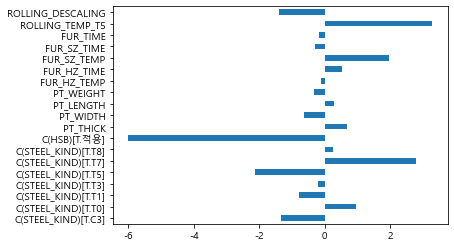

In [102]:
df_log_scaled_coef.plot.barh(y='Coef', legend=False)

### 5-2. 그래디언트 부스팅

In [26]:
# 더미 변수 만들기
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy

,SCALE,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,HSB_미적용,HSB_적용
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,...,0,0,0,1,0,0,0,0,0,1
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,...,0,0,0,1,0,0,0,0,0,1
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,...,0,0,0,0,0,0,0,1,0,1
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,...,0,0,0,0,0,0,0,1,0,1
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,20.14,3580,38639,21870,1172,72,1164,62,245,...,0,0,0,0,0,0,0,0,0,1
716,0,15.08,3212,48233,18340,1150,61,1169,61,238,...,0,0,0,0,0,0,0,0,0,1
717,0,16.60,3441,43688,19590,1169,65,1163,77,247,...,0,0,0,0,0,0,0,0,0,1
718,0,15.59,3363,48740,80240,1179,86,1163,45,243,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# 데이터 분할 7:3
df_raw_x = df_raw_dummy.drop('SCALE', axis=1, inplace=False)
df_raw_y = df_raw_dummy['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('분할 전', df_raw_x.shape)
print('분할 후 : train', df_train_x.shape, 'test', df_test_x.shape)

분할 전 (720, 22)
분할 후 : train (504, 22) test (216, 22)


In [108]:
train_accuracy = []; test_accuracy = []


para_lr = [lr*0.1 for lr in range(1, 10)]

for v_lr in para_lr:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate=v_lr)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_lr = pd.DataFrame()
df_lr['learningRate'] = para_lr
df_lr['trainaccuracy'] = train_accuracy
df_lr['testaccuracy'] = test_accuracy

df_lr.round(3)

,learningRate,trainaccuracy,testaccuracy
0,0.1,1.0,1.000
1,0.2,1.0,1.000
2,0.3,1.0,1.000
3,0.4,1.0,1.000
4,0.5,1.0,1.000
5,0.6,1.0,1.000
6,0.7,1.0,1.000
7,0.8,1.0,0.995
8,0.9,1.0,1.000


In [ ]:
# 0.1로 지정

In [111]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state=1234, n_estimators=v_n_estimators, learning_rate=0.1)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_lr = pd.DataFrame()
df_lr['n_estimators'] = para_n_tree
df_lr['trainaccuracy'] = train_accuracy
df_lr['testaccuracy'] = test_accuracy

df_lr.round(3)

,n_estimators,trainaccuracy,testaccuracy
0,10,0.958,0.972
1,20,0.966,0.977
2,30,0.974,0.977
3,40,0.988,0.981
4,50,0.994,0.991
5,60,1.000,0.991
6,70,1.000,0.995
7,80,1.000,1.000
8,90,1.000,1.000
9,100,1.000,1.000


In [ ]:
# 50

In [115]:
para_depth = [depth for depth in range(1, 11)]
para_split = [n_split*10 for n_split in range(2, 11)]
para_leaf = [n_leaf*5 for n_leaf in range(1, 11)]

estimator = GradientBoostingClassifier(n_estimators=50, random_state=1234)

param_grid = {'learning_rate':para_lr, 
             'max_depth':para_depth,
             'min_samples_leaf':para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)

grid_gb.fit(df_train_x, df_train_y)
print('best estimator model: \n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_gb.best_params_))
print('\nbest score: \n{}'.format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=10,
                           n_estimators=50, random_state=1234)

best parameter: 
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 10}

best score: 
0.988


In [117]:
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=5, n_estimators=50, learning_rate=0.2,
                                     random_state=1234)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

print('accuracy on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('accuracy on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))
print('confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))


accuracy on training set: 1.000
accuracy on test set: 0.995
confusion matrix: 
[[145   0]
 [  1  70]]
              precision    recall  f1-score   support

           0      0.993     1.000     0.997       145
           1      1.000     0.986     0.993        71

    accuracy                          0.995       216
   macro avg      0.997     0.993     0.995       216
weighted avg      0.995     0.995     0.995       216



In [118]:
# 중요한 영향 인자
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,ROLLING_TEMP_T5,0.584
20,HSB_미적용,0.148
6,FUR_SZ_TEMP,0.131
10,ROLLING_DESCALING,0.081
0,PT_THICK,0.037
21,HSB_적용,0.005
1,PT_WIDTH,0.003
3,PT_WEIGHT,0.002
5,FUR_HZ_TIME,0.002
7,FUR_SZ_TIME,0.002


Text(0, 0.5, '설명변수')

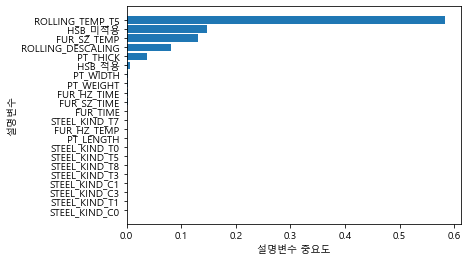

In [121]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### 5-3. 의사결정나무

In [28]:
df_raw_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    int32  
 1   PT_THICK           720 non-null    float64
 2   PT_WIDTH           720 non-null    int64  
 3   PT_LENGTH          720 non-null    int64  
 4   PT_WEIGHT          720 non-null    int64  
 5   FUR_HZ_TEMP        720 non-null    int64  
 6   FUR_HZ_TIME        720 non-null    int64  
 7   FUR_SZ_TEMP        720 non-null    int64  
 8   FUR_SZ_TIME        720 non-null    int64  
 9   FUR_TIME           720 non-null    int64  
 10  ROLLING_TEMP_T5    720 non-null    int64  
 11  ROLLING_DESCALING  720 non-null    int64  
 12  STEEL_KIND_C0      720 non-null    uint8  
 13  STEEL_KIND_C1      720 non-null    uint8  
 14  STEEL_KIND_C3      720 non-null    uint8  
 15  STEEL_KIND_T0      720 non-null    uint8  
 16  STEEL_KIND_T1      720 non

In [32]:
# 스케일링
v_feature_name = ['PT_THICK','PT_WIDTH','PT_LENGTH','PT_WEIGHT','FUR_HZ_TEMP',
                                         'FUR_HZ_TIME','FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
                                         'ROLLING_TEMP_T5','ROLLING_DESCALING']
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_raw_dummy[v_feature_name])
df_scaled = pd.DataFrame(df_raw_dummy, columns=v_feature_name)
df_scaled = pd.concat([df_raw_dummy.drop(v_feature_name, axis=1, inplace=False),df_scaled], axis=1)
df_scaled

,SCALE,STEEL_KIND_C0,STEEL_KIND_C1,STEEL_KIND_C3,STEEL_KIND_T0,STEEL_KIND_T1,STEEL_KIND_T3,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,...,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0,0,0,0,0,1,0,0,0,0,...,3707,15109,14180,1144,116,1133,59,282,934,8
1,0,0,0,0,0,1,0,0,0,0,...,3707,15109,14180,1144,122,1135,53,283,937,8
2,0,0,0,0,0,0,0,0,0,1,...,3619,19181,18130,1129,116,1121,55,282,889,8
3,0,0,0,0,0,0,0,0,0,1,...,3619,19181,18130,1152,125,1127,68,316,885,8
4,0,0,0,0,0,0,0,0,0,1,...,3098,13334,12430,1140,134,1128,48,314,873,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,1,0,0,0,0,0,0,0,0,...,3580,38639,21870,1172,72,1164,62,245,1005,8
716,0,1,0,0,0,0,0,0,0,0,...,3212,48233,18340,1150,61,1169,61,238,947,10
717,0,1,0,0,0,0,0,0,0,0,...,3441,43688,19590,1169,65,1163,77,247,948,10
718,0,1,0,0,0,0,0,0,0,0,...,3363,48740,80240,1179,86,1163,45,243,940,10


In [36]:
# 데이터 분할 7:3
df_raw_x = df_scaled.drop('SCALE', axis=1, inplace=False)
df_raw_y = df_scaled['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('분할 전', df_raw_x.shape)
print('분할 후 : train', df_train_x.shape, 'test', df_test_x.shape)

분할 전 (720, 22)
분할 후 : train (504, 22) test (216, 22)


In [58]:
para_depth = [depth for depth in range(1, 11)]
para_split = [n_split*10 for n_split in range(1, 11)]
para_leaf = [n_leaf*2 for n_leaf in range(1, 11)]

estimator = DecisionTreeClassifier()

param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=10)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 10}

best score: 
0.97


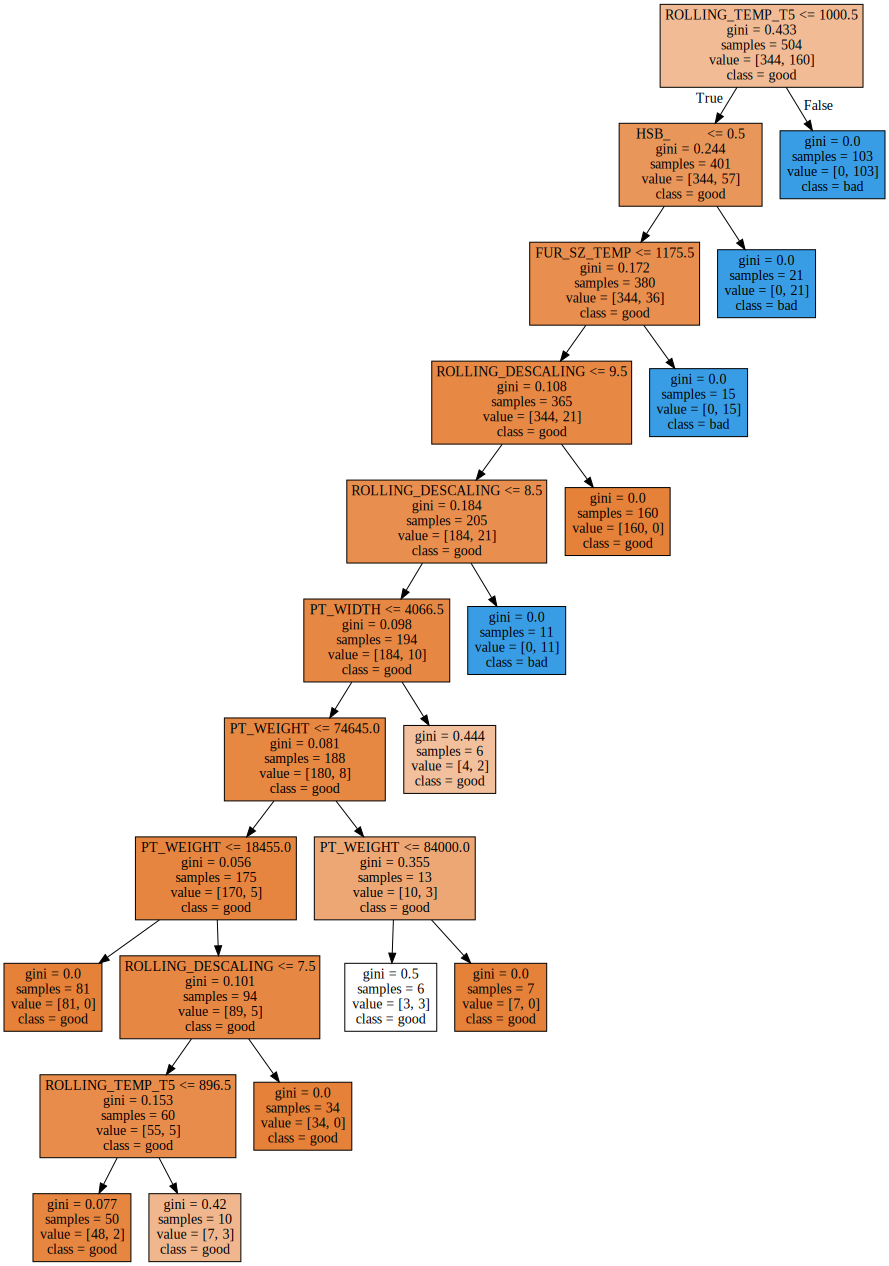

In [72]:
# 3. 최종모델 선정
## 최종모델
tree_final = DecisionTreeClassifier(random_state=1234, max_depth=10,min_samples_split=10,min_samples_leaf=6)
tree_final.fit(df_train_x, df_train_y)

## 최종 모델 시각화
# export
export_graphviz(tree_final, out_file='tree_fianl.dot',class_names = ['good', 'bad'], feature_names=v_feature_name,
                impurity=True, filled=True)

# 불러오기
with open('tree_fianl.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

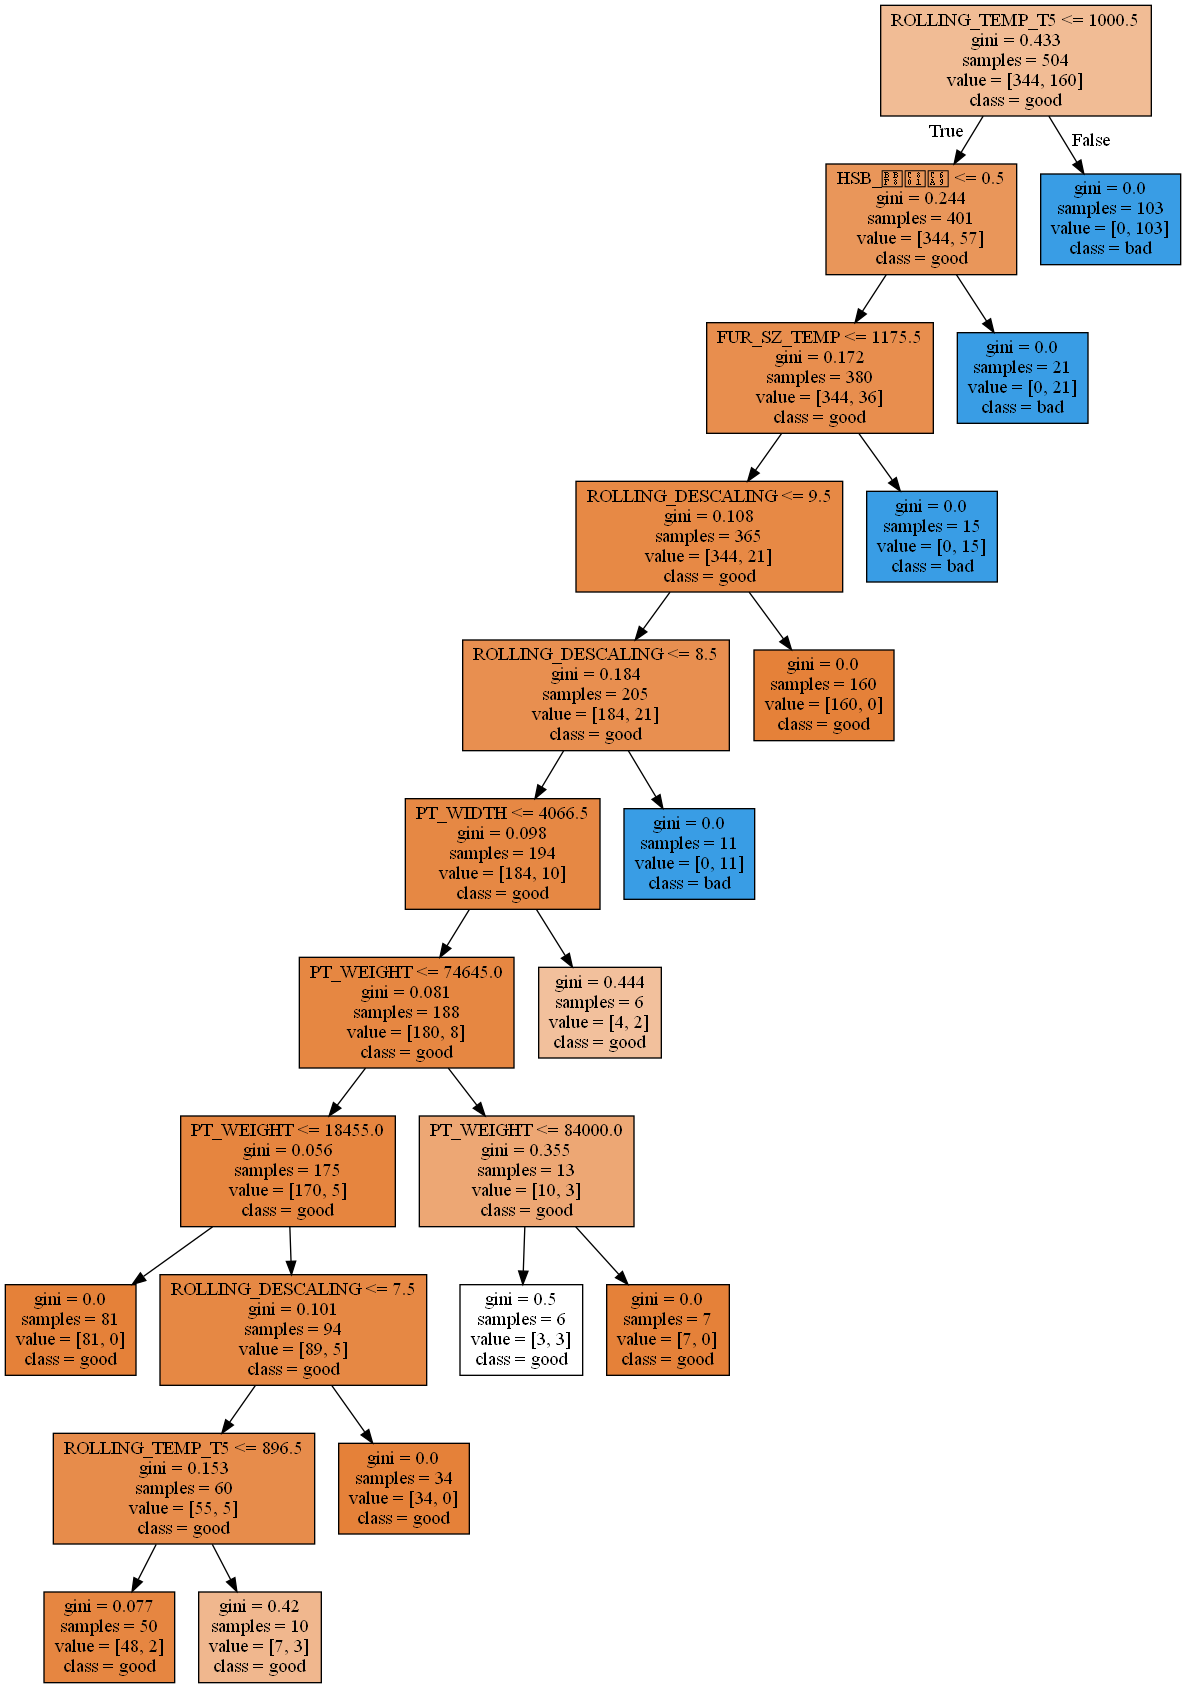

In [73]:
# 이미지가 너무 커서 png로 다시 로드
import pydot
from IPython.display import Image

filepath = "C:/Users/haeun/jupyter/tree_fianl"

(graph,) = pydot.graph_from_dot_file(filepath+'.dot', encoding='utf8')
graph.write_png(filepath+'.png', encoding='utf8')
Image(filename=filepath+'.png') 

In [74]:
## 최종 모델을 이용한 분류 예측
y_pred = tree_final.predict(df_test_x)
print('Accuracy: {0:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

## 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.991
Confusion matrix: 
[[145   0]
 [  2  69]]
              precision    recall  f1-score   support

           0      0.986     1.000     0.993       145
           1      1.000     0.972     0.986        71

    accuracy                          0.991       216
   macro avg      0.993     0.986     0.989       216
weighted avg      0.991     0.991     0.991       216



In [75]:
# 4. 결론 도출

## 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
20,ROLLING_TEMP_T5,0.595
9,HSB_미적용,0.159
17,FUR_SZ_TEMP,0.125
21,ROLLING_DESCALING,0.102
14,PT_WEIGHT,0.014
12,PT_WIDTH,0.005
19,FUR_TIME,0.000
18,FUR_SZ_TIME,0.000
16,FUR_HZ_TIME,0.000
15,FUR_HZ_TEMP,0.000


Text(0, 0.5, '설명변수')

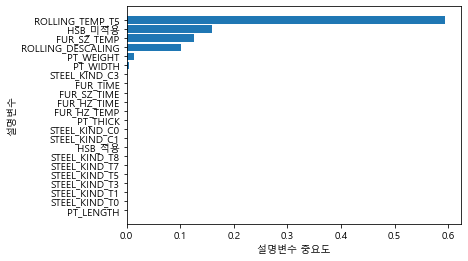

In [76]:
## 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [20]:
df_raw.loc[df_raw['SCALE']==0,'SCALE'] = '양품'
df_raw.loc[df_raw['SCALE']==1,'SCALE'] = '불량'

df_raw['SCALE'].head()

0    양품
1    양품
2    양품
3    양품
4    양품
Name: SCALE, dtype: object

In [47]:
df_raw.groupby('SCALE')['ROLLING_TEMP_T5'].agg('mean')

SCALE
불량    994.294372
양품    905.400818
Name: ROLLING_TEMP_T5, dtype: float64

In [22]:
df_raw.groupby('SCALE')['FUR_SZ_TEMP'].agg('mean')

SCALE
불량    1159.242424
양품    1145.143149
Name: FUR_SZ_TEMP, dtype: float64

In [23]:
df_raw.groupby('SCALE')['FUR_HZ_TEMP'].agg('mean')

SCALE
불량    1162.852814
양품    1151.789366
Name: FUR_HZ_TEMP, dtype: float64

In [12]:
df_raw.columns

Index(['SCALE', 'STEEL_KIND', 'PT_THICK', 'PT_WIDTH', 'PT_LENGTH', 'PT_WEIGHT',
       'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING'],
      dtype='object')